In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf  

In [2]:
#Get the stock quete
df = yf.download('AAPL', start='2012-01-01', end='2024-03-21')
#show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433825,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500650,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639428,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771559,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751298,394024400
...,...,...,...,...,...,...
2024-03-14,172.910004,174.309998,172.050003,173.000000,173.000000,72913500
2024-03-15,171.169998,172.619995,170.289993,172.619995,172.619995,121664700
2024-03-18,175.570007,177.710007,173.520004,173.720001,173.720001,75604200


In [3]:
#get the number of rows and colums in the data set
df.shape

(3073, 6)

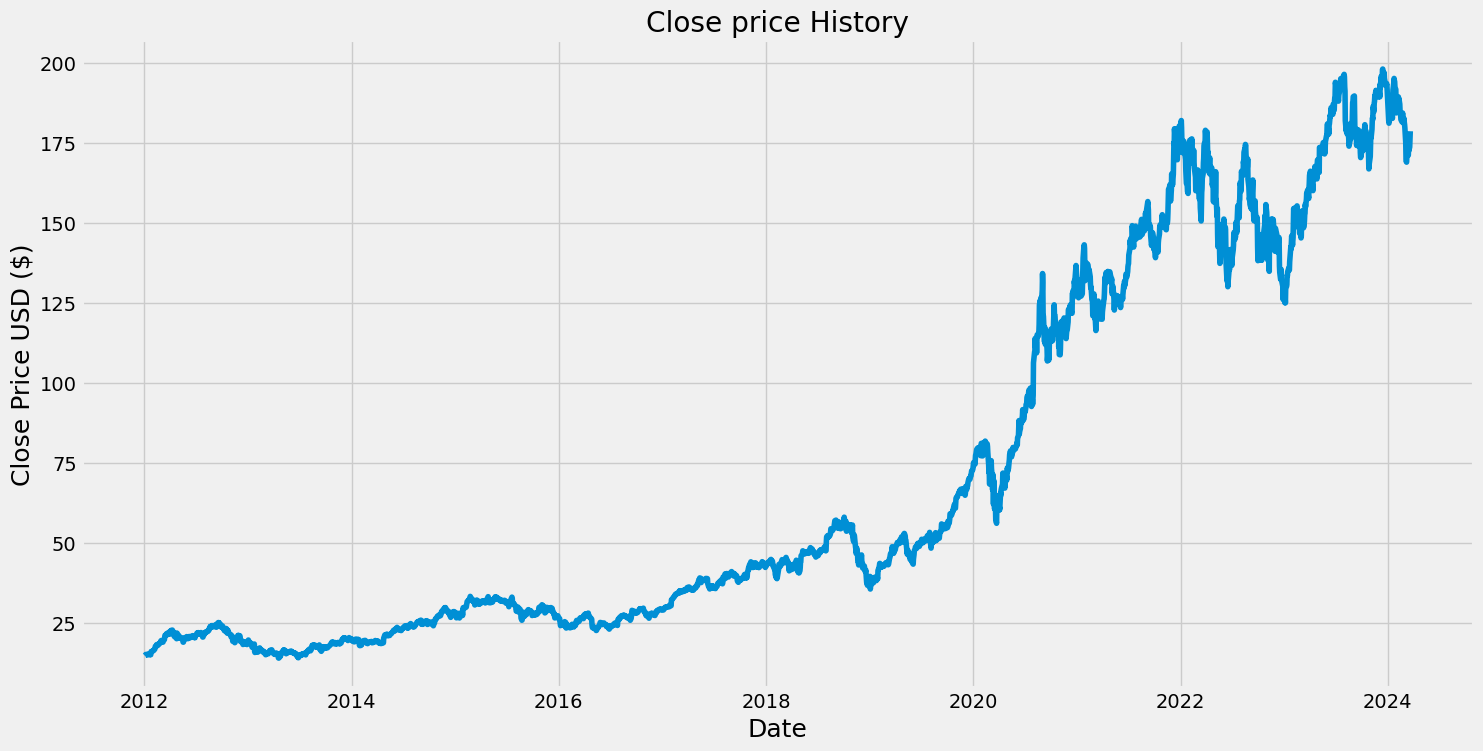

In [4]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18) 
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
#crate new dataframe with only the 'Close Column
data =  df.filter(['Close'])
# convert a datafram to anumpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

2459

In [6]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.86756262],
       [0.88037739],
       [0.89444104]])

In [7]:
#creating the training data set
#creating the scale trading data set

train_data = scaled_data[0:training_data_len , :]

#split the data into x_train and y_train data set

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.0

In [8]:
#convert the x_train and y_train to mumpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#reshapethe data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2399, 60, 1)

In [10]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False ))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
 model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


2399/2399 [==============================] - 61s 23ms/step - loss: 8.0838e-04


In [26]:
#crate the testing data set
#create a new array containing scaled values from index 2459 to 3073
test_data = scaled_data[training_data_len - 60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len (test_data)):
    x_test.append(test_data[i-60:i, 0])

In [27]:
#conver the data numpy arry
x_test = np.array(x_test)

In [28]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [29]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

20/20 [==============================] - 1s 25ms/step


In [30]:
#get the root mean squared error(RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

6.086937226705537

C:\Users\NATI\AppData\Local\Temp\ipykernel_6972\2435477293.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

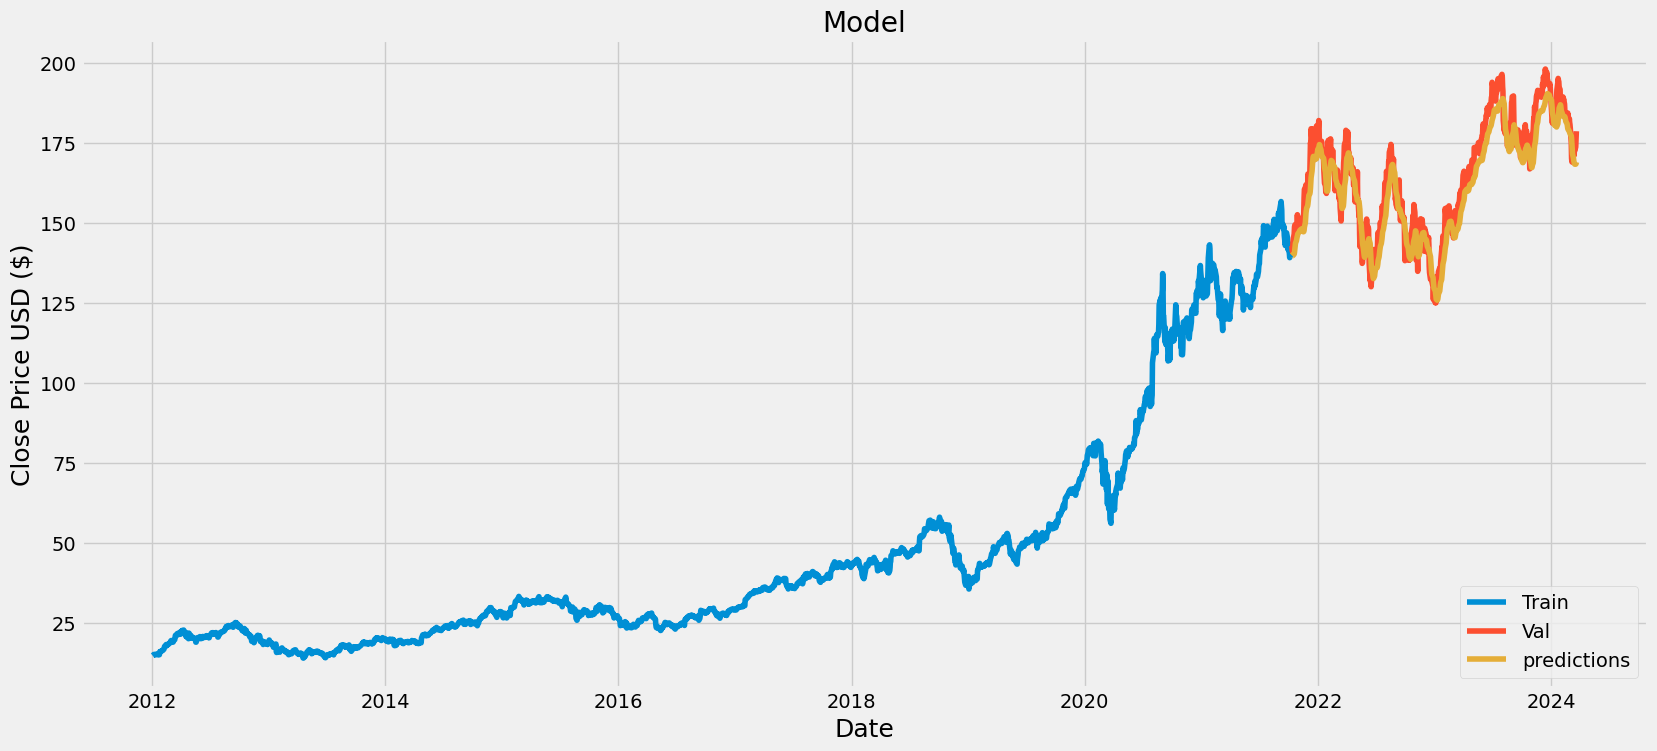

In [31]:
#plot the data
train = data[:training_data_len]
valid= data[training_data_len:]
valid['predictions'] = predictions

#visualize the data
plt.figure(figsize=(18,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'], loc='lower right')
plt.show

In [32]:
#show the valid and predicted prices
valid

,Close,predictions
Date,,
2021-10-11,142.809998,139.819336
2021-10-12,141.509995,139.919342
2021-10-13,140.910004,139.909332
2021-10-14,143.759995,139.786469
2021-10-15,144.839996,139.901962
...,...,...
2024-03-14,173.000000,168.487183
2024-03-15,172.619995,168.368256
2024-03-18,173.720001,168.357040


In [27]:
print(df.iloc[:])

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.433827   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.500646   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.639427   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.771557   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.751300   
...                ...         ...         ...         ...         ...   
2024-03-14  172.910004  174.309998  172.050003  173.000000  173.000000   
2024-03-15  171.169998  172.619995  170.289993  172.619995  172.619995   
2024-03-18  175.570007  177.710007  173.520004  173.720001  173.720001   
2024-03-19  174.339996  176.610001  173.029999  176.080002  176.080002   
2024-03-20  175.720001  178.669998  175.089996  178.669998  178.669998   

               Volume  
Date         

In [29]:
#Get the quote
apple_quote = yf.download('AAPL', start='2012-01-01', end='2024-03-21')

#create a new dataframe
new_df = apple_quote.filter(['Close'])

#get the last 60 day closing price values and conver the datafram to an array
last_60_days = new_df[-60:].values

#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#create an empty list
X_test = []

#append the past 60 days
X_test.append(last_60_days_scaled)

#convert the x_test data set to a numpy array
X_test = np.array(X_test)

#reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#get the predictedscaled price
pred_price = model.predict(X_test)

#undo the sclaing
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)




[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 68ms/step
[[173.36967]]


In [40]:
#Get the quote
apple_quote2 = yf.download('AAPL', start='2019-12-18', end='2019-12-19')
print(apple_quote2['Close'])

[*********************100%%**********************]  1 of 1 completed

Date
2019-12-18    69.934998
Name: Close, dtype: float64
